+ up to 7 words away in both directions
+ omitting stopwords - articles, prep, punct?
+ lowercase everything
+ phrase2vec

In [1]:
import sys
sys.path.append('../')
import os

In [2]:
from application.review_obj_class import ReviewObj
from application.namespan_class import NameSpanGenerator
import pandas as pd
import numpy as np
%pprint

Pretty printing has been turned OFF


In [3]:
directory = "../../aps_reviews_1000/"
filenames = os.listdir(directory)
reviews = ((file.split('.')[0], open(directory + file).read()) for file in filenames)

In [4]:
review_list = [ReviewObj(file, txt) for (file, txt) in reviews]

In [5]:
ex = NameSpanGenerator.generate(review_list[20])

In [6]:
[x.collocates for x in ex.spans]

[['.', 'In', 'paying', 'a', 'hearty', 'tribute', 'to', 'Dr._Gladden', "'s", 'zealous', 'philanthropy', 'and', 'evident', 'kindness', ','], ['Competition', 'is', 'the', 'bugbear', 'of', 'writers', 'of', 'Dr._Gladden', "'s", 'school', '.', 'One', 'would', 'imagine', 'it'], ['competition', '.', 'All', 'this', 'is', 'probably', 'what', 'Dr._Gladden', 'means', ',', 'but', 'something', 'far', 'more', 'revolutionary'], ['of', 'the', 'capital', 'of', 'the', 'country', '.', 'Dr._Gladden', 'is', 'not', 'consistent', 'upon', 'the', 'all-important', 'question']]

In [7]:
list(set((x for x in review_list[0].cleaned_text[:50].split() if x.isalnum())))

['New', 'Rl']

In [8]:
[x.name for x in ex.spans]

[Dr. Gladden, Dr. Gladden, Dr. Gladden, Dr. Gladden]

In [9]:
for x in review_list:
    x = NameSpanGenerator.generate(x)

In [10]:
example_reviews = [x for x in review_list if (len(x.person_names) > 3) and (len(x.pub_names) > 1)]

In [11]:
len(example_reviews)

77

In [12]:
[x.name for x in example_reviews[0].spans]

[Dr. Leopold Damrosch, Mr. Andrew Carnegie, Dr. LeopOld Damrosch, Prof. Horatio W. Parker, Mr. Parker, Lord. The, Oratorio Society, Oratorio Society, Mendelssohn Society, Symphony Society]

In [13]:
# # revs w front probs
# for e, rev in enumerate(example_reviews):
#     for num in [x.name.review_loc_toks for x in rev.spans]:
#         if num < 3:
#             print(e, [x.name.review_loc_toks for x in rev.spans])

In [14]:
# # revs w back probs
# for e, rev in enumerate(example_reviews):
#     for num in [x.name.review_loc_toks for x in rev.spans]:
#         if num > (len(rev.coll_toks_ind)-8):
#             print(e, [x.name.review_loc_toks for x in rev.spans])

In [15]:
# name_indices = [x.name.review_loc_toks for x in example_reviews[8].spans]

In [16]:
# name_indices2 = [x.name.review_loc_toks for x in example_reviews[27].spans]

In [17]:
# name_indices

In [18]:
# spans = example_reviews[8].spans

In [19]:
# spans2 = example_reviews[27].spans

In [20]:
# spans

In [21]:
import copy

In [22]:
# toks = copy.deepcopy(example_reviews[8].coll_toks_ind)

In [23]:
# toks2 = copy.deepcopy(example_reviews[27].coll_toks_ind)

In [24]:
# name_indices

In [25]:
# toks[(9-7):(9+8)]

In [26]:
# for e, span in enumerate(spans):
#     #print(e, span)
#     #print(name_indices[e] < 3)
#     if (name_indices[e] < 7):
#         #print(e)
#         ftoks = list((7-name_indices[e])*"^")
#         ftoks.extend((toks))
#         print(ftoks[0:(name_indices[e]+8+(7-name_indices[e]))])

In [27]:
# for e, span in enumerate(spans2):
#     if (name_indices2[e] > (len(toks2)-8)):
#         btoks = toks2
#         btoks.extend(list((name_indices2[e]-(len(toks2)-8)) * "$") )
#         print(btoks[(name_indices2[e]-7):])

## Looking through the collocations

In [28]:
review_list[20].spans

[<application.namespan_class.NameSpan object at 0x1a3fc4c090>, <application.namespan_class.NameSpan object at 0x1a3fc4c250>, <application.namespan_class.NameSpan object at 0x1a3fc4c510>, <application.namespan_class.NameSpan object at 0x1a3fc4c150>]

In [29]:
[span for spans in (rev.spans for rev in review_list[:2]) for span in spans]

[<application.namespan_class.NameSpan object at 0x1a3fc4e850>, <application.namespan_class.NameSpan object at 0x1a3fc4e110>, <application.namespan_class.NameSpan object at 0x1a3fc4e4d0>, <application.namespan_class.NameSpan object at 0x1a3fc4ecd0>, <application.namespan_class.NameSpan object at 0x1a3fc4ed10>, <application.namespan_class.NameSpan object at 0x1a3fc4eb50>, <application.namespan_class.NameSpan object at 0x1a3fc4e7d0>, <application.namespan_class.NameSpan object at 0x1a3fc4ec90>, <application.namespan_class.NameSpan object at 0x1a3fc4ed50>, <application.namespan_class.NameSpan object at 0x1a3fc4ed90>, <application.namespan_class.NameSpan object at 0x1a3fc4ea90>, <application.namespan_class.NameSpan object at 0x1a3fc4ec50>, <application.namespan_class.NameSpan object at 0x1a3fc4ee10>, <application.namespan_class.NameSpan object at 0x1a3fc4ee50>, <application.namespan_class.NameSpan object at 0x1a3fc4ee90>, <application.namespan_class.NameSpan object at 0x1a3fc4eed0>, <applic

In [30]:
spans = [span for spans in (rev.spans for rev in review_list) for span in spans]

In [31]:
len(spans)

5839

In [32]:
person_spans = [span for span in spans if span.label == 'person']

### Problem situations:
    
+ Okay: 0 1 name(2) 3 4
    + 2 !< 2
+ Bad: X 0 name(1) 2 3
    + 1 < 2
    + **2 - 1 = 1**
+ Bad: X X name(0) 2 3
    + 0 < 2
    + **2 - 0 = 2**

**Pattern: span.name.review_loc_toks < 2**

+ Okay: -5 -4 name(-3) -2 -1
    + 0 1 name(2) 3 4
    + 5 toks, 5 - 3 = 2
    + 2 !> 2
+ Bad: -4 -3 name(-2) -1 X
    + 0 1 name(2) 3
    + 4 toks, 4 - 3 = 1
    + 2 > 1
    + **2 - 1 = 1**
+ Bad: -3 -2 name(-1) X X
    + 0 1 name(2)
    + 3 toks, 3 - 3 = 0
    + 2 > 0
    + **2 - 0 = 2**
+ Bad: -4 -3 name(-2) -1 X
    + 300 301 302(name) 303 X
    + 304 toks, 304 - 3 = 301
    + 302 > 301
    + **302 - 301 = 1**
+ Bad: -3 -2 name(-1) X X
    + 302 303(name) X X
    + 304 toks, 304 - 3 = 301
    + 303 > 301
    + **303 - 301 = 2**

**Pattern: span.name.review_loc_toks > (len(toks)-3)**

In [33]:
# len([span.collocates for span in person_spans if len(span.collocates) < 5])

In [34]:
# [span.collocates for span in person_spans if len(span.collocates) < 5]

In [35]:
# problem_ids = [span.review_id for span in person_spans if len(span.collocates) < 5]

In [36]:
# problem_revs = [rev for rev in review_list if rev.review_id in problem_ids]

In [37]:
# len(problem_revs)

In [38]:
# import copy

In [39]:
# for review in problem_revs:
#     for span in review.spans:
#         toks = copy.deepcopy(review.coll_toks_ind)
#         ni = span.name.review_loc_toks
#         if (ni < 2):
#             print("front:")
#             ftoks = list((2-ni)*"^")
#             ftoks.extend((toks))
#             print(ftoks[0:(ni+3+(2-ni))])
#             print()
#         if (ni > (len(toks)-3)):
#             print("back:")
#             btoks = toks
#             btoks.extend(list((ni-(len(toks)-3)) * "$"))
#             print(btoks[(ni-2):])
#             print()

In [40]:
len(person_spans)

5192

In [41]:
coll_df = pd.DataFrame()

In [42]:
coll_df['review_id'] = list(map((lambda x: x.review_id), person_spans))
coll_df['review_group'] = list(map((lambda x: x.group), person_spans))

In [43]:
person_spans[0].collocates

["'s", 'Putt', 'Yourself', 'in', 'His', 'Place', 'and', 'Mrs._Canfield', "'s", 'The', 'Squirrel', 'Cage', '.', 'And', 'it']

In [44]:
# problem fixed
set([len(span.collocates) for span in person_spans])

{15}

In [45]:
coll_df['preceding_collocates'] = list(map((lambda x: x.collocates[:7]), person_spans))
coll_df['following_collocates'] = list(map((lambda x: x.collocates[8:]), person_spans))

coll_df['coll-7'] = list(map((lambda x: x.collocates[0]), person_spans))
coll_df['coll-6'] = list(map((lambda x: x.collocates[1]), person_spans))
coll_df['coll-5'] = list(map((lambda x: x.collocates[2]), person_spans))
coll_df['coll-4'] = list(map((lambda x: x.collocates[3]), person_spans))
coll_df['coll-3'] = list(map((lambda x: x.collocates[4]), person_spans))
coll_df['coll-2'] = list(map((lambda x: x.collocates[5]), person_spans))
coll_df['coll-1'] = list(map((lambda x: x.collocates[6]), person_spans))
coll_df['name_target'] = list(map((lambda x: x.name), person_spans))
coll_df['coll+1'] = list(map((lambda x: x.collocates[8]), person_spans))
coll_df['coll+2'] = list(map((lambda x: x.collocates[9]), person_spans))
coll_df['coll+3'] = list(map((lambda x: x.collocates[10]), person_spans))
coll_df['coll+4'] = list(map((lambda x: x.collocates[11]), person_spans))
coll_df['coll+5'] = list(map((lambda x: x.collocates[12]), person_spans))
coll_df['coll+6'] = list(map((lambda x: x.collocates[13]), person_spans))
coll_df['coll+7'] = list(map((lambda x: x.collocates[14]), person_spans))

In [46]:
coll_df['all_coll'] = coll_df.preceding_collocates + coll_df.following_collocates

In [47]:
coll_df.head()

,review_id,review_group,preceding_collocates,following_collocates,coll-7,coll-6,coll-5,coll-4,coll-3,coll-2,coll-1,name_target,coll+1,coll+2,coll+3,coll+4,coll+5,coll+6,coll+7,all_coll
0,137197814,21,"['s, Putt, Yourself, in, His, Place, and]","['s, The, Squirrel, Cage, ., And, it]",'s,Putt,Yourself,in,His,Place,and,Mrs. Canfield,'s,The,Squirrel,Cage,.,And,it,"['s, Putt, Yourself, in, His, Place, and, 's, ..."
1,137197814,22,"[The, Squirrel, Cage, ., And, it, is]","['s, own, fault, if, the, critics, have]",The,Squirrel,Cage,.,And,it,is,Mr. Anderson,'s,own,fault,if,the,critics,have,"[The, Squirrel, Cage, ., And, it, is, 's, own,..."
2,137197814,1,"[as, its, sister, arts, ., Years, ago]","[,, writing, of, an, earlier, ``, revolution]",as,its,sister,arts,.,Years,ago,Mr. George Moore,",",writing,of,an,earlier,``,revolution,"[as, its, sister, arts, ., Years, ago, ,, writ..."
3,137197814,26,"[of, a, Gauguin, or, a, Matisse, .]","[is, a, story-teller, given, to, free, experim...",of,a,Gauguin,or,a,Matisse,.,Mr. Swinnerton,is,a,story-teller,given,to,free,experimentation,"[of, a, Gauguin, or, a, Matisse, ., is, a, sto..."
4,137197814,33,"[is, one, of, our, own, house, .]","[seems, to, have, been, aware, from, the]",is,one,of,our,own,house,.,Mr. Hergesheimer,seems,to,have,been,aware,from,the,"[is, one, of, our, own, house, ., seems, to, h..."


In [48]:
coll_df.preceding_collocates.value_counts()[:10]

[^, ^, ^, ^, ^, ^, ^]                                   14
[,, in, two, volumes, ,, edited, by]                     3
[^, ^, ^, ^, ^, MISCELLANEOUS, .]                        2
[the, New, Testament, ,, ``, edited, by]                 2
['s, Sons, ,, New, York, ., )]                           2
[myself, with, all, that, I, need, .]                    1
[the, exposition, Is, mainly, historical, ,, though]     1
[experiences, in, Europe, Uf, ., B, ,]                   1
[and, details, of, errors, and, their, corrections]      1
[as, the, inal, criteria, of, genius, by]                1
Name: preceding_collocates, dtype: int64

In [49]:
coll_df.following_collocates.value_counts()[:10]

[., $, $, $, $, $, $]                                                   7
[can, find, in, it, abundant, material, for]                            2
['s, book, will, help, on, the, good]                                   2
[,, M., D., 8vo, ,, pp, .]                                              2
[Jews, ,, Professor_Errera, produces, some, interesting, statistics]    1
[the, influence, of, her, husband, ., Less]                             1
[seems, to, be, much, more, proud, of]                                  1
[``, Apropos, of, constitutions, ,, few, Americans]                     1
[., Professor_Allen, holds, the, chair, of, Church]                     1
['s, position, in, reference, to, nullification, ,]                     1
Name: following_collocates, dtype: int64

In [50]:
coll_df.all_coll.value_counts()[:10]

[said, of, ``, I, ', he, Gay, ', was, true, ,, ought, to, be]                                      1
['s, New, York, Harper, Brothers, Chicago, McOlurg, 8, ., Morris, has, made, of, sea-songs]        1
[even, among, his, own, countrymen, ., He, ,, insists, Dr._Brandt, ,, the, pioneer, in]            1
[., We, more, than, half, suspect, that, meant, to, be, unsatisfactory, ;, that, he]               1
[of, the, modes, provided, by, itself, ., 's, position, in, reference, to, nullification, ,]       1
[In, the, commonest, ramble, are, transformed, by, 's, pen, into, something, new, strange, and]    1
[is, a, careful, and, pains-taking, essay, by, ,, on, the, Pathological, Histology, of, the]       1
[has, been, largely, psycho-logical., ``, His, chef, ,, ``, Dr._Brandt, tells, us, ,, ``]          1
[and, living, openly, with, another, man, ,, ., Just, why, we, are, introduced, to]                1
[as, long, as, ten, years, ago, by, in, the, first, two, volumes, of, his]                 

In [51]:
temp = coll_df[['review_id' , 'review_group' , 'name_target' , 'all_coll']]

In [52]:
temp.head()

,review_id,review_group,name_target,all_coll
0,137197814,21,Mrs. Canfield,"['s, Putt, Yourself, in, His, Place, and, 's, ..."
1,137197814,22,Mr. Anderson,"[The, Squirrel, Cage, ., And, it, is, 's, own,..."
2,137197814,1,Mr. George Moore,"[as, its, sister, arts, ., Years, ago, ,, writ..."
3,137197814,26,Mr. Swinnerton,"[of, a, Gauguin, or, a, Matisse, ., is, a, sto..."
4,137197814,33,Mr. Hergesheimer,"[is, one, of, our, own, house, ., seems, to, h..."


following code adapted from here: https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element

In [53]:
lst_col = 'all_coll'

In [54]:
split_colls_df = pd.DataFrame({
      col:np.repeat(temp[col].values, temp[lst_col].str.len())
      for col in temp.columns.drop(lst_col)})

In [55]:
split_colls_df.head()

,review_id,review_group,name_target
0,137197814,21,Mrs. Canfield
1,137197814,21,Mrs. Canfield
2,137197814,21,Mrs. Canfield
3,137197814,21,Mrs. Canfield
4,137197814,21,Mrs. Canfield


In [56]:
person_colls = [coll for colls in (rev.collocates for rev in person_spans) for coll in enumerate(colls)]

In [57]:
person_colls = [x for x in person_colls if x[0] != 7]

In [58]:
person_colls[:10]

[(0, "'s"), (1, 'Putt'), (2, 'Yourself'), (3, 'in'), (4, 'His'), (5, 'Place'), (6, 'and'), (8, "'s"), (9, 'The'), (10, 'Squirrel')]

In [59]:
len(person_colls)

72688

In [60]:
coll_nums = [x[0] for x in person_colls]
coll_item = [x[1] for x in person_colls]

In [61]:
coll_nums[:5]

[0, 1, 2, 3, 4]

In [62]:
set(coll_nums)

{0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14}

In [63]:
mapper = {0:-7, 1:-6, 2:-5, 3:-4, 4:-3, 5:-2, 6:-1, 8:1, 9:2, 10:3, 11:4, 12:5, 13:6, 14:7}

In [64]:
[mapper[x] for x in coll_nums[:20]]

[-7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, -7, -6, -5, -4, -3, -2]

In [65]:
coll_item[:5]

["'s", 'Putt', 'Yourself', 'in', 'His']

In [66]:
split_colls_df['collocate'] = coll_item
split_colls_df['coll_position'] = [mapper[x] for x in coll_nums]

In [67]:
split_colls_df.head()

,review_id,review_group,name_target,collocate,coll_position
0,137197814,21,Mrs. Canfield,'s,-7
1,137197814,21,Mrs. Canfield,Putt,-6
2,137197814,21,Mrs. Canfield,Yourself,-5
3,137197814,21,Mrs. Canfield,in,-4
4,137197814,21,Mrs. Canfield,His,-3


In [68]:
split_colls_df.collocate.value_counts()[:20]

,       4412
the     3550
of      3467
.       2985
and     1861
to      1286
in      1279
's      1275
is      1077
``      1058
a        979
by       893
that     626
as       572
has      571
his      524
The      523
with     401
on       376
for      372
Name: collocate, dtype: int64

### Cleaning the collocations: lowercasing, removing stopwords, punctuation

In [69]:
from nltk.corpus import stopwords

In [70]:
sw = stopwords.words('english')

In [71]:
sw

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [72]:
# see below
"us" in sw

False

In [73]:
sw.append("us")

In [74]:
from string import punctuation

In [75]:
punct = list(punctuation)
punct

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [76]:
def clean_collocation(coll):
    temp = coll.lower()
    parts = temp.split('_')
    if len(parts) > 1:
        return "name_obj"
    elif temp in sw:
        return "sw"
    elif all([x in punct for x in list(temp)]):
        return "punct"
    else:
        return temp

In [77]:
all([x in punct for x in list("``")])

True

In [78]:
for x in split_colls_df.collocate[:20]:
    print(x, clean_collocation(x), sep = '\t')

's	's
Putt	putt
Yourself	sw
in	sw
His	sw
Place	place
and	sw
's	's
The	sw
Squirrel	squirrel
Cage	cage
.	punct
And	sw
it	sw
The	sw
Squirrel	squirrel
Cage	cage
.	punct
And	sw
it	sw


In [79]:
'Mrs._Canfield'.split('_')

['Mrs.', 'Canfield']

In [80]:
'Canfield'.split('_')

['Canfield']

In [81]:
for e, x in enumerate(split_colls_df.collocate[:500]):
    parts = x.split('_')
    if len(parts) > 1:
        print(e, x, sep = '\t')

152	Mr._Hergesheimer
155	Mr._Conrad
400	Mr._Hergesheimer
404	Mr._Cabell
411	Mr._Conrad
416	Mr._Cabell
421	Mr._Conrad
423	Mr._Hergesheimer
474	Mr._James_Joyce
477	Miss_Richardson


In [82]:
for x in split_colls_df.collocate[150:160]:
    print(x, clean_collocation(x), sep = '\t')

work	work
of	sw
Mr._Hergesheimer	name_obj
suggests	suggests
of	sw
Mr._Conrad	name_obj
.	punct
The	sw
later	later
work	work


In [83]:
split_colls_df['cleaned'] = split_colls_df.collocate.map(clean_collocation)

## Exploring the cleaned collocates

In [84]:
split_colls_df.head(20)

,review_id,review_group,name_target,collocate,coll_position,cleaned
0,137197814,21,Mrs. Canfield,'s,-7,'s
1,137197814,21,Mrs. Canfield,Putt,-6,putt
2,137197814,21,Mrs. Canfield,Yourself,-5,sw
3,137197814,21,Mrs. Canfield,in,-4,sw
4,137197814,21,Mrs. Canfield,His,-3,sw
5,137197814,21,Mrs. Canfield,Place,-2,place
6,137197814,21,Mrs. Canfield,and,-1,sw
7,137197814,21,Mrs. Canfield,'s,1,'s
8,137197814,21,Mrs. Canfield,The,2,sw
9,137197814,21,Mrs. Canfield,Squirrel,3,squirrel


In [85]:
split_colls_df.cleaned.value_counts()[:20]

sw          28272
punct       10405
name_obj     1940
's           1275
book          230
one           211
work          196
new           185
volume        126
life          111
first          98
made           93
history        91
well           84
great          84
upon           83
little         83
would          81
written        81
years          81
Name: cleaned, dtype: int64

Stopwords, punctuation, and name objects (could be person or pub name) appear far more frequently than anything else. Excluding those, "'s" and "book" seem like they could be good indicators. 

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
sns.set(font_scale = 1.5)

In [88]:
top20colls = split_colls_df.cleaned.value_counts()[3:23]
top20colls

's         1275
book        230
one         211
work        196
new         185
volume      126
life        111
first        98
made         93
history      91
well         84
great        84
upon         83
little       83
would        81
written      81
years        81
two          79
york         79
much         76
Name: cleaned, dtype: int64

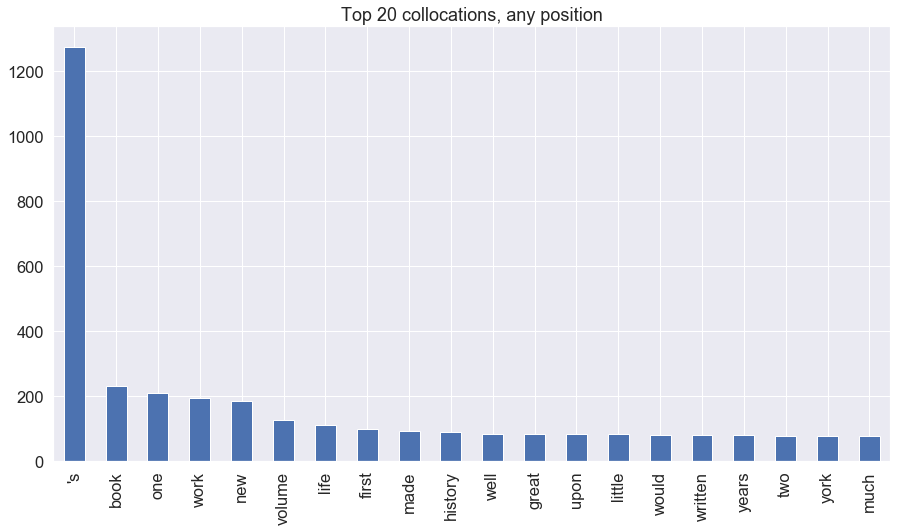

In [89]:
top20colls.plot(kind = "bar", figsize = (15, 8), title = "Top 20 collocations, any position")

In [90]:
split_colls_df.cleaned[30] in top20colls

False

In [91]:
"'s" in top20colls

True

In [92]:
cleaned_colls_df = split_colls_df
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "sw"]
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "punct"]
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "name_obj"]

In [93]:
grouped = cleaned_colls_df.groupby('coll_position').cleaned.value_counts()

In [94]:
print(grouped)

coll_position  cleaned  
-7             's           29
               one          19
               new          17
               book         15
               little       12
                            ..
 7             wyolif        1
               y.            1
               yellow        1
               york-more     1
               zeilung       1
Name: cleaned, Length: 21469, dtype: int64


In [95]:
grouped.unstack().head()

cleaned,'s,'serious,'sher,*1.oo,*a,*h,*is,*made,*the,*thia,...,youth,youthful,yredlerick,z873,zealous,zeilung,zest,zola,zoology,zulus
coll_position,,,,,,,,,,,,,,,,,,,,,
-7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-6,25.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5,19.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
grouped.unstack()[["'s", "zoology"]]

cleaned,'s,zoology
coll_position,,
-7,29.0,NaN
-6,25.0,NaN
-5,19.0,NaN
-4,22.0,NaN
-3,25.0,NaN
-2,14.0,1.0
-1,7.0,NaN
1,845.0,NaN
2,61.0,NaN


In [97]:
top20words = list(top20colls.index)
top20words

["'s", 'book', 'one', 'work', 'new', 'volume', 'life', 'first', 'made', 'history', 'well', 'great', 'upon', 'little', 'would', 'written', 'years', 'two', 'york', 'much']

In [98]:
grouped.unstack()[top20words]

cleaned,'s,book,one,work,new,volume,life,first,made,history,well,great,upon,little,would,written,years,two,york,much
coll_position,,,,,,,,,,,,,,,,,,,,
-7,29.0,15.0,19.0,10.0,17.0,6.0,3.0,4.0,5.0,4.0,6.0,8.0,7.0,12.0,3.0,6.0,7.0,6.0,6.0,3.0
-6,25.0,12.0,20.0,9.0,18.0,10.0,7.0,7.0,4.0,8.0,8.0,4.0,4.0,7.0,10.0,2.0,4.0,5.0,6.0,5.0
-5,19.0,11.0,10.0,8.0,13.0,14.0,13.0,4.0,9.0,8.0,4.0,3.0,4.0,3.0,9.0,3.0,8.0,8.0,11.0,6.0
-4,22.0,7.0,11.0,12.0,19.0,5.0,18.0,5.0,7.0,10.0,3.0,6.0,9.0,3.0,2.0,3.0,5.0,4.0,5.0,7.0
-3,25.0,11.0,21.0,10.0,12.0,9.0,9.0,11.0,5.0,6.0,7.0,8.0,4.0,5.0,7.0,4.0,15.0,8.0,8.0,7.0
-2,14.0,16.0,18.0,28.0,7.0,14.0,13.0,4.0,15.0,8.0,7.0,6.0,2.0,5.0,2.0,12.0,7.0,1.0,3.0,8.0
-1,7.0,7.0,6.0,11.0,5.0,12.0,5.0,4.0,4.0,2.0,NaN,2.0,9.0,2.0,2.0,7.0,4.0,NaN,3.0,2.0
1,845.0,8.0,2.0,3.0,3.0,3.0,NaN,3.0,5.0,2.0,1.0,1.0,8.0,2.0,13.0,3.0,NaN,1.0,NaN,NaN
2,61.0,67.0,19.0,40.0,19.0,13.0,6.0,5.0,10.0,9.0,11.0,3.0,5.0,17.0,4.0,23.0,1.0,12.0,NaN,5.0


I'm figuring the words with the highest standard deviation are only good indicators in a specific position. Like "'s". 

In [99]:
grouped.unstack()[top20words].describe()

cleaned,'s,book,one,work,new,volume,life,first,made,history,well,great,upon,little,would,written,years,two,york,much
count,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,13.000000,14.000000,14.000000,14.00000,13.000000,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,13.000000,12.000000,13.000000
mean,91.071429,16.428571,15.071429,14.00000,13.214286,9.000000,8.538462,7.000000,6.642857,6.50000,6.461538,6.000000,5.928571,5.928571,5.785714,6.230769,6.230769,6.076923,6.583333,5.846154
std,217.765034,15.305677,5.993128,9.28191,5.493753,3.679465,4.909436,3.396831,3.319109,2.65301,3.017046,3.573406,2.730576,4.066075,3.400873,5.761277,3.539158,3.012793,2.466441,2.764241
min,7.000000,7.000000,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000
25%,22.750000,8.750000,11.000000,10.00000,9.000000,6.000000,5.000000,4.000000,4.250000,4.50000,4.000000,3.000000,4.000000,3.250000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000
50%,27.500000,12.000000,17.500000,11.50000,14.000000,9.500000,7.000000,6.000000,5.000000,7.00000,7.000000,6.000000,5.500000,5.000000,5.500000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,57.000000,15.750000,19.750000,14.00000,17.750000,12.000000,13.000000,9.750000,8.500000,8.75000,8.000000,8.000000,8.750000,6.000000,7.750000,6.000000,7.000000,8.000000,8.250000,7.000000
max,845.000000,67.000000,21.000000,40.00000,19.000000,14.000000,18.000000,13.000000,15.000000,10.00000,11.000000,14.000000,10.000000,17.000000,13.000000,23.000000,15.000000,12.000000,11.000000,12.000000


Yeah, "'s" has a huge std dev. "Book" is also fairly high. The rest all seem consistent-ish.

Maybe lemmas will help group some similar words, e.g. book and books.

In [100]:
from nltk.stem import WordNetLemmatizer

In [101]:
lemmatizer = WordNetLemmatizer()

In [102]:
split_colls_df.head()

,review_id,review_group,name_target,collocate,coll_position,cleaned
0,137197814,21,Mrs. Canfield,'s,-7,'s
1,137197814,21,Mrs. Canfield,Putt,-6,putt
2,137197814,21,Mrs. Canfield,Yourself,-5,sw
3,137197814,21,Mrs. Canfield,in,-4,sw
4,137197814,21,Mrs. Canfield,His,-3,sw


In [103]:
for x in split_colls_df.cleaned[:30]:
    print(x, lemmatizer.lemmatize(x))

's 's
putt putt
sw sw
sw sw
sw sw
place place
sw sw
's 's
sw sw
squirrel squirrel
cage cage
punct punct
sw sw
sw sw
sw sw
squirrel squirrel
cage cage
punct punct
sw sw
sw sw
sw sw
's 's
sw sw
fault fault
sw sw
sw sw
critics critic
sw sw
sw sw
sw sw


In [104]:
split_colls_df['lemmas'] = split_colls_df.cleaned.map(lemmatizer.lemmatize)

In [105]:
split_colls_df.head()

,review_id,review_group,name_target,collocate,coll_position,cleaned,lemmas
0,137197814,21,Mrs. Canfield,'s,-7,'s,'s
1,137197814,21,Mrs. Canfield,Putt,-6,putt,putt
2,137197814,21,Mrs. Canfield,Yourself,-5,sw,sw
3,137197814,21,Mrs. Canfield,in,-4,sw,sw
4,137197814,21,Mrs. Canfield,His,-3,sw,sw


In [106]:
top20colls

's         1275
book        230
one         211
work        196
new         185
volume      126
life        111
first        98
made         93
history      91
well         84
great        84
upon         83
little       83
would        81
written      81
years        81
two          79
york         79
much         76
Name: cleaned, dtype: int64

In [107]:
top20lemmas = split_colls_df.lemmas.value_counts()[3:23]
top20lemmas

's         1275
book        263
work        221
one         212
new         185
volume      161
life        119
say         118
year        106
first        98
made         93
history      91
story        86
well         84
great        84
author       84
upon         83
little       83
give         82
would        81
Name: lemmas, dtype: int64

In [108]:
for e, x in enumerate(top20colls):
    # print(top20colls.index[e], '\t', x, '\t\t',
          # top20lemmas.index[e], '\t', top20lemmas[e])
    print(top20colls.index[e], '\t', top20lemmas.index[e])

's 	 's
book 	 book
one 	 work
work 	 one
new 	 new
volume 	 volume
life 	 life
first 	 say
made 	 year
history 	 first
well 	 made
great 	 history
upon 	 story
little 	 well
would 	 great
written 	 author
years 	 upon
two 	 little
york 	 give
much 	 would


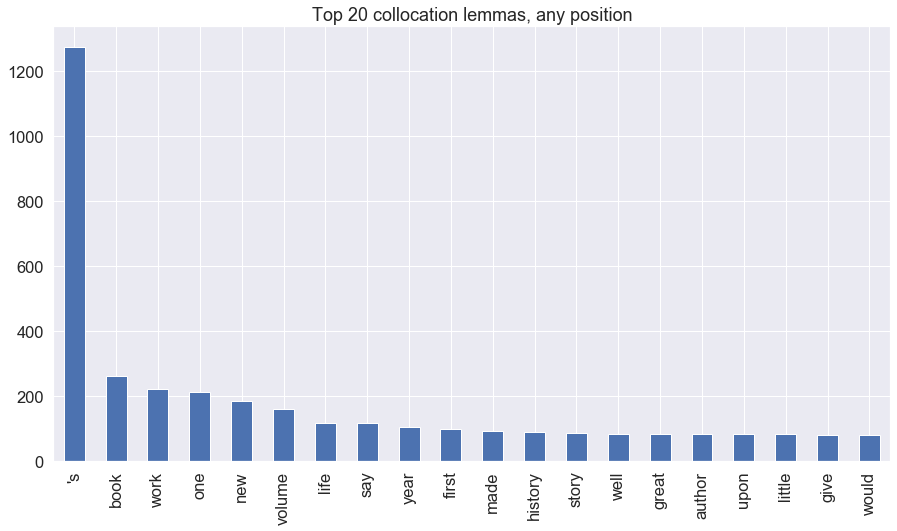

In [109]:
top20lemmas.plot(kind = "bar", figsize = (15, 8), title = "Top 20 collocation lemmas, any position")

In [110]:
cleaned_colls_df = split_colls_df
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "sw"]
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "punct"]
cleaned_colls_df = cleaned_colls_df[cleaned_colls_df.cleaned != "name_obj"]

In [111]:
grouped2 = cleaned_colls_df.groupby('coll_position').lemmas.value_counts()

In [112]:
grouped2.unstack()[list(top20lemmas.index)]

lemmas,'s,book,work,one,new,volume,life,say,year,first,made,history,story,well,great,author,upon,little,give,would
coll_position,,,,,,,,,,,,,,,,,,,,
-7,29.0,15.0,12.0,19.0,17.0,10.0,3.0,2.0,11.0,4.0,5.0,4.0,3.0,6.0,8.0,7.0,7.0,12.0,4.0,3.0
-6,25.0,15.0,12.0,20.0,18.0,10.0,9.0,5.0,4.0,7.0,4.0,8.0,1.0,8.0,4.0,7.0,4.0,7.0,4.0,10.0
-5,19.0,14.0,11.0,10.0,13.0,15.0,15.0,2.0,10.0,4.0,9.0,8.0,6.0,4.0,3.0,6.0,4.0,3.0,3.0,9.0
-4,22.0,8.0,13.0,11.0,19.0,12.0,18.0,3.0,8.0,5.0,7.0,10.0,6.0,3.0,6.0,5.0,9.0,3.0,1.0,2.0
-3,25.0,11.0,10.0,21.0,12.0,9.0,9.0,1.0,16.0,11.0,5.0,6.0,4.0,7.0,8.0,3.0,4.0,5.0,2.0,7.0
-2,14.0,22.0,32.0,19.0,7.0,19.0,14.0,12.0,11.0,4.0,15.0,8.0,12.0,7.0,6.0,11.0,2.0,5.0,NaN,2.0
-1,7.0,12.0,11.0,6.0,5.0,14.0,6.0,16.0,6.0,4.0,4.0,2.0,2.0,NaN,2.0,6.0,9.0,2.0,2.0,2.0
1,845.0,8.0,4.0,2.0,3.0,3.0,NaN,24.0,NaN,3.0,5.0,2.0,1.0,1.0,1.0,2.0,8.0,2.0,26.0,13.0
2,61.0,73.0,43.0,19.0,19.0,13.0,6.0,12.0,2.0,5.0,10.0,9.0,9.0,11.0,3.0,3.0,5.0,17.0,6.0,4.0


In [113]:
grouped2.unstack()[list(top20lemmas.index)].describe()

lemmas,'s,book,work,one,new,volume,life,say,year,first,made,history,story,well,great,author,upon,little,give,would
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,13.000000,14.000000,13.000000,14.000000,14.000000,14.00000,14.000000,13.000000,14.000000,14.000000,14.000000,14.000000,13.000000,14.000000
mean,91.071429,18.785714,15.785714,15.142857,13.214286,11.500000,9.153846,8.428571,8.153846,7.000000,6.642857,6.50000,6.142857,6.461538,6.000000,6.000000,5.928571,5.928571,6.307692,5.785714
std,217.765034,16.296194,9.924163,6.036519,5.493753,3.917417,4.913352,6.524678,3.869672,3.396831,3.319109,2.65301,3.526976,3.017046,3.573406,2.353394,2.730576,4.066075,6.368995,3.400873
min,7.000000,8.000000,4.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.00000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,22.750000,12.000000,11.250000,11.000000,9.000000,9.250000,5.000000,3.250000,6.000000,4.000000,4.250000,4.50000,3.250000,4.000000,3.000000,5.000000,4.000000,3.250000,3.000000,3.000000
50%,27.500000,14.500000,12.500000,18.000000,14.000000,11.000000,9.000000,7.500000,8.000000,6.000000,5.000000,7.00000,6.500000,7.000000,6.000000,6.000000,5.500000,5.000000,5.000000,5.500000
75%,57.000000,18.750000,15.500000,19.750000,17.750000,14.000000,14.000000,12.000000,11.000000,9.750000,8.500000,8.75000,8.750000,8.000000,8.000000,7.000000,8.750000,6.000000,6.000000,7.750000
max,845.000000,73.000000,43.000000,21.000000,19.000000,19.000000,18.000000,24.000000,16.000000,13.000000,15.000000,10.00000,12.000000,11.000000,14.000000,11.000000,10.000000,17.000000,26.000000,13.000000


### NOTE TO SELF: DON'T RERUN THIS PART

In [108]:
split_colls_df[split_colls_df.lemmas == 'u']

,review_id,review_group,name_target,collocate,coll_position,cleaned,lemmas
1059,124764143,0,Mr. H. G. Wells,us,3,us,u
2045,90167733,7,Mr. Boutwvell,us,-6,us,u
2082,90167733,7,Mr. Boutwell,us,4,us,u
2930,89669022,0,Mr. Lawton,us,-3,us,u
3163,128143842,6,Mr Abbey,us,7,us,u
...,...,...,...,...,...,...,...
70445,757746240,9,Madame Recamier,us,5,us,u
71078,137653744,1,Mr. Julian Hawthorne,us,-7,us,u
71457,137077872,0,Dr. Royce,us,-6,us,u
72089,124737516,0,Lord Ten,us,-4,us,u


__nltk WHY__

In [109]:
set(list(split_colls_df[split_colls_df.lemmas == 'u'].cleaned))

{'u', 'us'}

In [110]:
split_colls_df[split_colls_df.cleaned == 'u']

,review_id,review_group,name_target,collocate,coll_position,cleaned,lemmas
4671,90390665,3,Miss HowAiD,u,3,u,u
30850,127406065,0,Mr. D),u,2,u,u
32113,136722216,1,Dr. James Beaty,u,5,u,u
32929,89675095,4,Mr. Billious,u,-6,u,u
59935,90536609,7,Dr. Gladden,u,-6,u,u


at least these 5 are just poorly OCR'ed.

In [115]:
from nltk import pos_tag

In [116]:
for x in split_colls_df.cleaned[:10]:
    print(pos_tag(x))
    # print(x, lemmatizer.lemmatize(x))

[("'", 'POS'), ('s', 'NN')]
[('p', 'NN'), ('u', 'JJ'), ('t', 'NN'), ('t', 'NN')]
[('s', 'NN'), ('w', 'NN')]
[('s', 'NN'), ('w', 'NN')]
[('s', 'NN'), ('w', 'NN')]
[('p', 'NN'), ('l', 'VBZ'), ('a', 'DT'), ('c', 'NN'), ('e', 'NN')]
[('s', 'NN'), ('w', 'NN')]
[("'", 'POS'), ('s', 'NN')]
[('s', 'NN'), ('w', 'NN')]
[('s', 'NN'), ('q', 'NN'), ('u', 'NN'), ('i', 'NN'), ('r', 'VBP'), ('r', 'NN'), ('e', 'NN'), ('l', 'NN')]


NLTK's lemmatization works much better with POS tagging - which NLTK does easily. However, it only POS tags documents, not individual words. I would need to go back and add POS tags to the review object text. Which I totally could, but I'll wait to see if Matt things it's worth it.

I checked out spacy's lemmatizer, but it seems like it also requires an entire document. That might be worth trying too.

## Next up: collocate co-occurances?

## scikit-learn mutual information?

not gonna bother with this anymore, analysis is now above

In [117]:
# ex = ["●" if "●" in x else x for x in review_list[5].coll_toks_all]

In [118]:
# ex = ["^","^"] + ex + ["$","$"]

In [119]:
# ex[:10]

In [120]:
# ex[-10:]

In [121]:
# len(ex)-5

In [122]:
# ex[12747]

In [123]:
# for e, tok in enumerate(ex):
#     if e <= len(ex)-5:
#         coll = ex[e:e+5]
#         if coll[2]=="●":
#             print(coll[:2] + coll[3:], 1)
#         else:
#             print(coll[:2] + coll[3:], 0)
#     #print(coll, coll[2]=="●")

In [124]:
# def getColl(ReviewObj):
#     features = []
#     targets = []
#     toks = ["^","^"] + ["●" if "●" in x else x for x in ReviewObj.coll_toks_all] + ["$","$"]
#     for e, tok in enumerate(toks):
#         if e <= len(ex)-5:
#             coll = ex[e:e+5]
#             if coll[2]=="●":
#                 features.append(coll[:2] + coll[3:])
#                 targets.append(1)
#             else:
#                 features.append(coll[:2] + coll[3:])
#                 targets.append(0)
#     return features, targets

In [125]:
# features, targets = getColl(review_list[0])

In [127]:
# features = []
# targets = []
# for rev in review_list:
#     x, y = getColl(rev)
#     features.extend(x)
#     targets.extend(y)

In [128]:
# targets[:10]

In [129]:
# for x in features[:10]:
#     print(x)

In [130]:
# feature_df = pd.DataFrame(features)

In [131]:
# feature_df.head()

In [132]:
# this takes so long to load
# just a warning
# feature_df = pd.get_dummies(feature_df, drop_first=True)

In [133]:
# feature_df.head()

In [134]:
# len(feature_df)

In [135]:
# target_df = pd.DataFrame(targets)

In [136]:
# len(target_df)

In [137]:
# from sklearn.feature_selection import mutual_info_classif

In [138]:
# from numpy import ravel

In [139]:
# targ_array = ravel(target_df)

In [140]:
# targ_array[:10]

In [141]:
# mi_array = mutual_info_classif(feature_df, targ_array)